In [4]:
# How can we get a clean dataset of COVID deaths in WI?
import geopandas as gpd
import os

if not os.path.exists("covid.geojson"):
    print("DOWNLOADING")
    url = "https://opendata.arcgis.com/datasets/559d482bad0643f69cbe1538243e0baa_9.geojson"
    df = gpd.read_file(url)
    df.to_file("covid.geojson", index=0)

df = gpd.read_file("covid.geojson")

In [7]:
df.columns

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'NEG_CUM', 'NEG_NEW',
       'NEG_7DAYAVG', 'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG',
       'POS_CUM_CONF', 'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB',
       'POS_NEW_PROB', 'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF',
       'DTH_7DAYAVG_CONF', 'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB',
       'DTH_7DAYAVG_PROB', 'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP',
       'POS_OTH_CP', 'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP',
       'POS_30_39_CP', 'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP',
       'POS_70_79_CP', 'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP',
       'DTHS_MALE_CP', 'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP',
       'DTHS_20_29_CP', 'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP',
       'DTHS_60_69_CP', 'DTHS_70_79_CP', 'DTHS_80_89_CP', 'DTHS_90_CP',
       'PO

In [ ]:
# POP, POS_CUM_CP, POS_???_???_CP, DTH_CUM_CP

In [15]:
# cleaning
df = df[df["GEOID"].str.fullmatch(r"\d+")] # remove non tract data
df.replace(-999, 2, inplace=True) # -999 means 0-4 (hidden for privacy reasons)

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

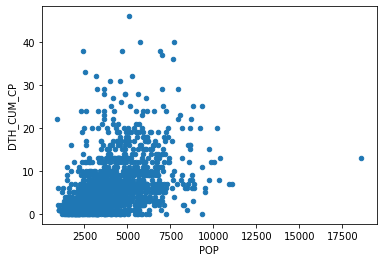

In [16]:
df.plot.scatter(x="POP", y="DTH_CUM_CP")

In [9]:
df.sort_values(by="DTH_CUM_CP", ascending=False).head()

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
1203,2021-11-12T20:00:00+00:00,TRACT N/A,None,21657,88,66.86,276,0,1.0,0,...,10968,9477,2021-11-11T00:00:00+00:00,0,NaN,2982,Census tract,4.661914e+02,80.071546,"POLYGON ((-87.04159 44.13490, -87.04161 44.134..."
1372,2021-11-12T20:00:00+00:00,55135100600,None,930,5,2.86,46,0,0.0,0,...,459,419,2021-11-11T00:00:00+00:00,5071,238.0,3561,Census tract,3.632761e+08,100622.628105,"POLYGON ((-89.06994 44.33802, -89.07060 44.338..."
919,2021-11-12T20:00:00+00:00,55059000602,None,1267,5,2.29,40,0,0.0,0,...,478,703,2021-11-11T00:00:00+00:00,7708,532.0,2675,Census tract,1.468191e+07,18208.599197,"POLYGON ((-87.84582 42.63908, -87.84604 42.639..."
1385,2021-11-12T20:00:00+00:00,55133202202,None,1013,3,1.71,40,0,0.0,0,...,442,477,2021-11-11T00:00:00+00:00,5738,314.0,3602,Census tract,5.952951e+06,13537.586161,"POLYGON ((-88.23580 43.01317, -88.23587 43.013..."
68,2021-11-12T20:00:00+00:00,55101001502,None,1111,0,2.43,38,0,0.0,0,...,991,32,2021-11-11T00:00:00+00:00,6891,368.0,336,Census tract,2.466766e+07,24613.421935,"POLYGON ((-87.79587 42.80634, -87.79851 42.806..."


In [22]:
# How can we train/fit models to known data to predict unknowns?

# POP => DTH_CUM_CP

# sklearn expects something like a DataFrame for the features(x)
xcols = ["POP"]
df[xcols].head()

,POP
0,2243
1,5217
2,6787
3,3493
4,1463


In [23]:
# sklearn expects something like a Series for the label(y)
ycol = "DTH_CUM_CP"
df[ycol].head()

0     0
1     6
2    19
3     7
4     0
Name: DTH_CUM_CP, dtype: int64

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[xcols], df[ycol]) # fit means train

predict_df = pd.DataFrame({
    "POP": [1000, 2000]
})
predict_df["predict_death"] = model.predict(predict_df[xcols]) # what y values are estimated
predict_df

,POP,predict_death
0,1000,2.525213
1,2000,3.867524


In [28]:
# How can we visualize model predictions?
predict_df = pd.DataFrame({
    "POP": range(0, 20000, 1000)
})
predict_df["predict_death"] = model.predict(predict_df) # what y values are estimated
predict_df.head()

,POP,predict_death
0,0,1.182903
1,1000,2.525213
2,2000,3.867524
3,3000,5.209834
4,4000,6.552145


<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

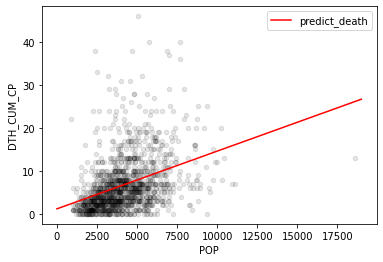

In [33]:
ax = predict_df.plot.line(x="POP", y="predict_death", color="red")
df.plot.scatter(x="POP", y="DTH_CUM_CP", ax=ax, color="black", alpha=0.1)

In [ ]:
# How can we get a formula for the relationship?

In [ ]:
# How well does our model fit the data?

In [ ]:
# Did our model learn or memorize (that is, "overfit")?

In [ ]:
# How can we minimize noise due to random train/test splits?

In [ ]:
# How can we compare models?

In [ ]:
# How can we use multiple x variables (multiple regression)?

In [ ]:
# How can we interpret what features the model is relying on?